In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
df_vibe = pd.read_csv('/content/unique_employees_weighted_vibe.csv')
df = pd.read_csv('/content/unique_employees_weighted_reward.csv')

In [ ]:
df_vibe.shape

(315, 2)

In [ ]:
df.shape

(318, 3)

In [ ]:
df.head()

,Employee_ID,Weighted_Reward_Points,Weighted_Award_Type
0,EMP0001,63.000000,1.0
1,EMP0002,409.000000,1.0
2,EMP0003,346.000000,2.0
3,EMP0004,168.000002,3.0
4,EMP0007,108.000000,1.0


In [ ]:
df_merged = pd.merge(df, df_vibe[['Employee_ID', 'Weighted_vibe_Score']], on='Employee_ID', how='right')
df_merged.head()

,Employee_ID,Weighted_Reward_Points,Weighted_Award_Type,Weighted_vibe_Score
0,EMP0002,409.000000,1.0,1.0000
1,EMP0003,346.000000,2.0,2.9996
2,EMP0004,168.000002,3.0,4.0000
3,EMP0005,NaN,NaN,3.0000
4,EMP0006,NaN,NaN,5.0000


In [ ]:
df_merged.shape

(315, 4)

In [ ]:
df_merged.isna().sum()

,0
Employee_ID,0
Weighted_Reward_Points,113
Weighted_Award_Type,113
Weighted_vibe_Score,0


In [ ]:
df_merged.fillna(0, inplace = True)

In [ ]:
df_merged.isna().sum()

,0
Employee_ID,0
Weighted_Reward_Points,0
Weighted_Award_Type,0
Weighted_vibe_Score,0


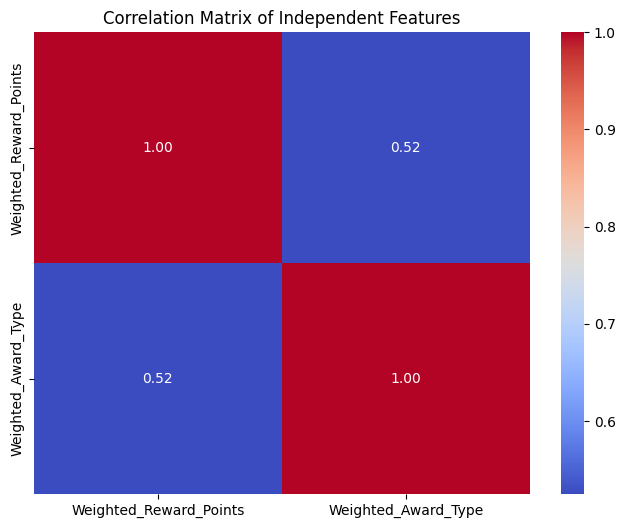

In [ ]:
independent_features = ['Weighted_Reward_Points', 'Weighted_Award_Type']
correlation_matrix = df_merged[independent_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Features")
plt.show()

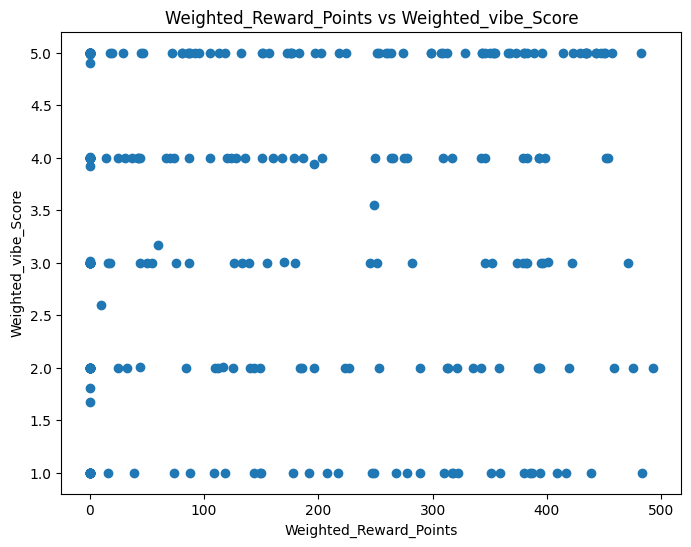

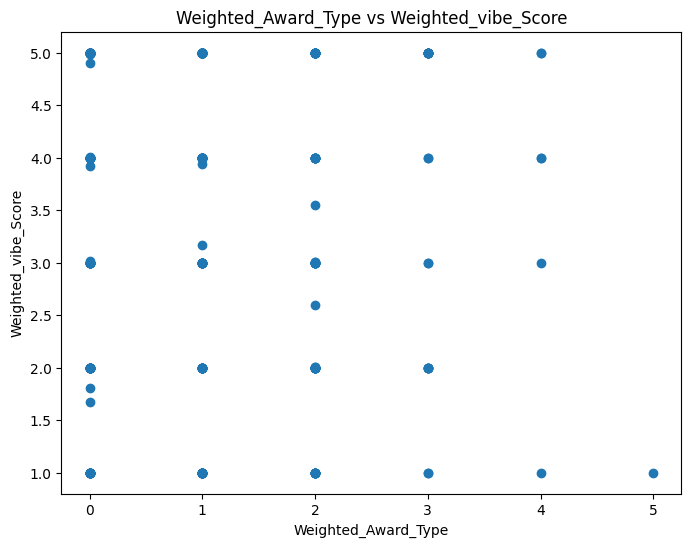

In [ ]:
for feature in independent_features:
  plt.figure(figsize=(8, 6))
  plt.scatter(df_merged[feature], df_merged['Weighted_vibe_Score'])
  plt.xlabel(feature)
  plt.ylabel('Weighted_vibe_Score')
  plt.title(f'{feature} vs Weighted_vibe_Score')
  plt.show()

In [ ]:
correlation_with_emotion = df_merged[independent_features + ['Weighted_vibe_Score']].corr()['Weighted_vibe_Score'][:-1]

print("Correlation between independent features and Weighted_vibe_Score:")
correlation_with_emotion

Correlation between independent features and Weighted_vibe_Score:


,Weighted_vibe_Score
Weighted_Reward_Points,0.010340
Weighted_Award_Type,-0.028273


In [ ]:
X = df_merged[independent_features].values
y = df_merged['Weighted_vibe_Score'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
input_layer = Input(shape=(X_scaled.shape[1],))

encoded = Dense(35, activation='relu')(input_layer)
encoded = Dense(30, activation='relu')(encoded)
encoded = Dense(25, activation='relu')(encoded)
encoded_feature = Dense(1, activation='linear', name='combined_feature')(encoded)

output_layer = Dense(1, activation='linear', name='vibe_score_prediction')(encoded_feature)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')

model.fit(X_scaled, y, epochs=200, batch_size=4, verbose=1, shuffle=True)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0450 
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8405
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6621
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4634
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2671
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0710
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3128
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2377
Epoch 9/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3414
Epoch 10/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4619
Epoch 11/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2022
Epoch 12/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2941
Epoch 13/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2594
Epoch 14/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2691
Epoch 15/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1448
Epo

In [ ]:
encoder = Model(inputs=input_layer, outputs=encoded_feature)
df_merged['combined_feature_rewards'] = encoder.predict(X_scaled)

df_merged[['Employee_ID', 'combined_feature_rewards', 'Weighted_vibe_Score']]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Employee_ID,combined_feature_rewards,Weighted_vibe_Score
0,EMP0002,1.924273,1.0000
1,EMP0003,1.741234,2.9996
2,EMP0004,2.251842,4.0000
3,EMP0005,1.910918,3.0000
4,EMP0006,1.910918,5.0000
...,...,...,...
310,EMP0491,1.910918,5.0000
311,EMP0493,1.920413,2.0074
312,EMP0497,1.910918,2.0000
313,EMP0498,2.378252,5.0000


In [ ]:
df_merged[['combined_feature_rewards', 'Weighted_vibe_Score']].corr()

,combined_feature_rewards,Weighted_vibe_Score
combined_feature_rewards,1.000000,0.266854
Weighted_vibe_Score,0.266854,1.000000


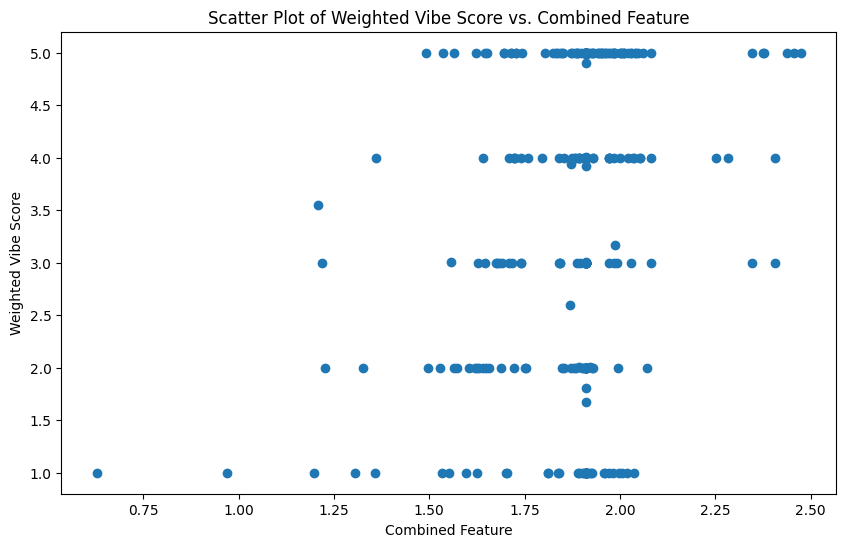

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['combined_feature_rewards'], df_merged['Weighted_vibe_Score'])
plt.xlabel('Combined Feature')
plt.ylabel('Weighted Vibe Score')
plt.title('Scatter Plot of Weighted Vibe Score vs. Combined Feature')
plt.show()

In [ ]:
quantile_20 = df_merged['combined_feature_rewards'].quantile(0.2)
quantile_80 = df_merged['combined_feature_rewards'].quantile(0.8)
range_80_20 = quantile_80 - quantile_20

df_merged['should_chat_rewards'] = np.where(
    df_merged['combined_feature_rewards'] < quantile_20,
    ((quantile_20 - df_merged['combined_feature_rewards']) / range_80_20) * 100,
    np.where(
        df_merged['combined_feature_rewards'] > quantile_80,
        ((quantile_80 - df_merged['combined_feature_rewards']) / range_80_20) * 100,
        0
    )
)

In [ ]:
df_merged.head()

,Employee_ID,Weighted_Reward_Points,Weighted_Award_Type,Weighted_vibe_Score,combined_feature_rewards,should_chat_rewards
0,EMP0002,409.000000,1.0,1.0000,1.924273,0.000000
1,EMP0003,346.000000,2.0,2.9996,1.741234,39.421040
2,EMP0004,168.000002,3.0,4.0000,2.251842,-198.373795
3,EMP0005,0.000000,0.0,3.0000,1.910918,0.000000
4,EMP0006,0.000000,0.0,5.0000,1.910918,0.000000


In [ ]:
df_merged.to_csv('combined_feature_rewards.csv', index = False)